##  Account Distribution and Income Category Analysis

#### Problem Statement:

Analyze a dataset containing information about various account types and their corresponding income categories. The goal is to understand the distribution of accounts across different types, with a specific focus on the percentage of accounts belonging to the "Term Deposit" category and the "120K +" income category.


In [55]:
import pandas as pd
import numpy as np

In [56]:
data = pd.read_csv("final_data.csv")

In [57]:
data

,CLIENTNUM,AC_DESC,Male/Female,OCCUPATION_PROFESSION_43,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,CHOUDHARY SAGHIR AHMAD,male,Salaried,Existing Customer,Active,31,51000,business account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,MUHAMMAD FAROOQ,male,Land Lord,Existing Customer,Active,43,37703,business account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,ILMO SANAT TRUST,male,Business,Existing Customer,Active,58,NaN,current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,ILMO SANAT TRUST,male,Business,Existing Customer,Active,41,11140,current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,SHAUKAT KHANUM MEMORIAL TRUST,male,Business,Existing Customer,Active,59,38703,jawan account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,UMAR,male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than $40K,Blue,41,5,1,1,1860.0
10123,789491058,SYED WAQAS AHMED,male,Retired,Existing Customer,dormant,43,37851,Term Deposit,4,Graduate,Married,Less than $40K,Blue,34,2,3,1,1620.0
10124,815253708,GHULAM FATIMA,female,Retired,Existing Customer,dormant,46,31135,Term Deposit,2,High School,Divorced,Less than $40K,Blue,41,1,2,2,2841.0
10125,757837458,WAHEED SHAHZAD,male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [58]:
data.shape

(10127, 19)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   AC_DESC                   10127 non-null  object 
 2   Male/Female               10127 non-null  object 
 3   OCCUPATION_PROFESSION_43  9367 non-null   object 
 4   Attrition_Flag            10127 non-null  object 
 5   Account Status            10127 non-null  object 
 6   Customer_Age              10127 non-null  int64  
 7   Account Balance           7965 non-null   object 
 8   Account Type              10127 non-null  object 
 9   Dependent_count           10127 non-null  int64  
 10  Education_Level           10127 non-null  object 
 11  Marital_Status            10127 non-null  object 
 12  Income_Category           10127 non-null  object 
 13  Card_Category             10127 non-null  object 
 14  Months

In [60]:
data.isnull().sum()

CLIENTNUM                      0
AC_DESC                        0
Male/Female                    0
OCCUPATION_PROFESSION_43     760
Attrition_Flag                 0
Account Status                 0
Customer_Age                   0
Account Balance             2162
Account Type                   0
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
dtype: int64

### Data Cleaning

In [61]:
# standardise the columns name

data.rename(columns = str.title).head()


,Clientnum,Ac_Desc,Male/Female,Occupation_Profession_43,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_On_Book,Total_Relationship_Count,Months_Inactive_12_Mon,Contacts_Count_12_Mon,Credit_Limit
0,712617408,CHOUDHARY SAGHIR AHMAD,male,Salaried,Existing Customer,Active,31,51000,business account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,MUHAMMAD FAROOQ,male,Land Lord,Existing Customer,Active,43,37703,business account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,ILMO SANAT TRUST,male,Business,Existing Customer,Active,58,NaN,current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,ILMO SANAT TRUST,male,Business,Existing Customer,Active,41,11140,current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,SHAUKAT KHANUM MEMORIAL TRUST,male,Business,Existing Customer,Active,59,38703,jawan account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0


In [62]:
# rename some of the columns

data.rename({"Male/Female":"Gender"}, axis = 1, inplace = True)

In [63]:
data

,CLIENTNUM,AC_DESC,Gender,OCCUPATION_PROFESSION_43,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,CHOUDHARY SAGHIR AHMAD,male,Salaried,Existing Customer,Active,31,51000,business account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,MUHAMMAD FAROOQ,male,Land Lord,Existing Customer,Active,43,37703,business account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,ILMO SANAT TRUST,male,Business,Existing Customer,Active,58,NaN,current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,ILMO SANAT TRUST,male,Business,Existing Customer,Active,41,11140,current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,SHAUKAT KHANUM MEMORIAL TRUST,male,Business,Existing Customer,Active,59,38703,jawan account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,UMAR,male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than $40K,Blue,41,5,1,1,1860.0
10123,789491058,SYED WAQAS AHMED,male,Retired,Existing Customer,dormant,43,37851,Term Deposit,4,Graduate,Married,Less than $40K,Blue,34,2,3,1,1620.0
10124,815253708,GHULAM FATIMA,female,Retired,Existing Customer,dormant,46,31135,Term Deposit,2,High School,Divorced,Less than $40K,Blue,41,1,2,2,2841.0
10125,757837458,WAHEED SHAHZAD,male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [64]:
data.rename({"AC_DESC":"Customer_Name","OCCUPATION_PROFESSION_43":"Occupation_Profession"}, axis = 1, inplace = True)

In [65]:
data

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,CHOUDHARY SAGHIR AHMAD,male,Salaried,Existing Customer,Active,31,51000,business account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,MUHAMMAD FAROOQ,male,Land Lord,Existing Customer,Active,43,37703,business account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,ILMO SANAT TRUST,male,Business,Existing Customer,Active,58,NaN,current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,ILMO SANAT TRUST,male,Business,Existing Customer,Active,41,11140,current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,SHAUKAT KHANUM MEMORIAL TRUST,male,Business,Existing Customer,Active,59,38703,jawan account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,UMAR,male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than $40K,Blue,41,5,1,1,1860.0
10123,789491058,SYED WAQAS AHMED,male,Retired,Existing Customer,dormant,43,37851,Term Deposit,4,Graduate,Married,Less than $40K,Blue,34,2,3,1,1620.0
10124,815253708,GHULAM FATIMA,female,Retired,Existing Customer,dormant,46,31135,Term Deposit,2,High School,Divorced,Less than $40K,Blue,41,1,2,2,2841.0
10125,757837458,WAHEED SHAHZAD,male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [66]:
data_df =data.copy()
data_df

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,CHOUDHARY SAGHIR AHMAD,male,Salaried,Existing Customer,Active,31,51000,business account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,MUHAMMAD FAROOQ,male,Land Lord,Existing Customer,Active,43,37703,business account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,ILMO SANAT TRUST,male,Business,Existing Customer,Active,58,NaN,current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,ILMO SANAT TRUST,male,Business,Existing Customer,Active,41,11140,current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,SHAUKAT KHANUM MEMORIAL TRUST,male,Business,Existing Customer,Active,59,38703,jawan account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,UMAR,male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than $40K,Blue,41,5,1,1,1860.0
10123,789491058,SYED WAQAS AHMED,male,Retired,Existing Customer,dormant,43,37851,Term Deposit,4,Graduate,Married,Less than $40K,Blue,34,2,3,1,1620.0
10124,815253708,GHULAM FATIMA,female,Retired,Existing Customer,dormant,46,31135,Term Deposit,2,High School,Divorced,Less than $40K,Blue,41,1,2,2,2841.0
10125,757837458,WAHEED SHAHZAD,male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [67]:
# check duplicates in row and columns

data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

In [68]:
data_df.duplicated().value_counts() # no duplicates in rows

False    10127
Name: count, dtype: int64

In [69]:
data_df["Occupation_Profession"].isnull().value_counts()

Occupation_Profession
False    9367
True      760
Name: count, dtype: int64

In [70]:
data_df["Occupation_Profession"]= data_df["Occupation_Profession"].str.title()

In [71]:
data_df

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,CHOUDHARY SAGHIR AHMAD,male,Salaried,Existing Customer,Active,31,51000,business account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,MUHAMMAD FAROOQ,male,Land Lord,Existing Customer,Active,43,37703,business account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,ILMO SANAT TRUST,male,Business,Existing Customer,Active,58,NaN,current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,ILMO SANAT TRUST,male,Business,Existing Customer,Active,41,11140,current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,SHAUKAT KHANUM MEMORIAL TRUST,male,Business,Existing Customer,Active,59,38703,jawan account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,UMAR,male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than $40K,Blue,41,5,1,1,1860.0
10123,789491058,SYED WAQAS AHMED,male,Retired,Existing Customer,dormant,43,37851,Term Deposit,4,Graduate,Married,Less than $40K,Blue,34,2,3,1,1620.0
10124,815253708,GHULAM FATIMA,female,Retired,Existing Customer,dormant,46,31135,Term Deposit,2,High School,Divorced,Less than $40K,Blue,41,1,2,2,2841.0
10125,757837458,WAHEED SHAHZAD,male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [72]:
data_df["Customer_Name"] = data_df["Customer_Name"].str.title()

In [73]:
data_df

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,Choudhary Saghir Ahmad,male,Salaried,Existing Customer,Active,31,51000,business account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,Muhammad Farooq,male,Land Lord,Existing Customer,Active,43,37703,business account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,Ilmo Sanat Trust,male,Business,Existing Customer,Active,58,NaN,current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,Ilmo Sanat Trust,male,Business,Existing Customer,Active,41,11140,current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,Shaukat Khanum Memorial Trust,male,Business,Existing Customer,Active,59,38703,jawan account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,Umar,male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than $40K,Blue,41,5,1,1,1860.0
10123,789491058,Syed Waqas Ahmed,male,Retired,Existing Customer,dormant,43,37851,Term Deposit,4,Graduate,Married,Less than $40K,Blue,34,2,3,1,1620.0
10124,815253708,Ghulam Fatima,female,Retired,Existing Customer,dormant,46,31135,Term Deposit,2,High School,Divorced,Less than $40K,Blue,41,1,2,2,2841.0
10125,757837458,Waheed Shahzad,male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [74]:
data_df["Account Status"] = data_df["Account Status"].str.title()


In [75]:
data_df["Gender"] = data_df["Gender"].str.title()

In [76]:
data_df

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,Choudhary Saghir Ahmad,Male,Salaried,Existing Customer,Active,31,51000,business account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,Muhammad Farooq,Male,Land Lord,Existing Customer,Active,43,37703,business account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,Ilmo Sanat Trust,Male,Business,Existing Customer,Active,58,NaN,current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,Ilmo Sanat Trust,Male,Business,Existing Customer,Active,41,11140,current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,Shaukat Khanum Memorial Trust,Male,Business,Existing Customer,Active,59,38703,jawan account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,Umar,Male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than $40K,Blue,41,5,1,1,1860.0
10123,789491058,Syed Waqas Ahmed,Male,Retired,Existing Customer,Dormant,43,37851,Term Deposit,4,Graduate,Married,Less than $40K,Blue,34,2,3,1,1620.0
10124,815253708,Ghulam Fatima,Female,Retired,Existing Customer,Dormant,46,31135,Term Deposit,2,High School,Divorced,Less than $40K,Blue,41,1,2,2,2841.0
10125,757837458,Waheed Shahzad,Male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [77]:
data_df["Account Type"] = data_df["Account Type"].str.title()

In [78]:
data_df

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,Choudhary Saghir Ahmad,Male,Salaried,Existing Customer,Active,31,51000,Business Account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,Muhammad Farooq,Male,Land Lord,Existing Customer,Active,43,37703,Business Account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,Ilmo Sanat Trust,Male,Business,Existing Customer,Active,58,NaN,Current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,Ilmo Sanat Trust,Male,Business,Existing Customer,Active,41,11140,Current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,Shaukat Khanum Memorial Trust,Male,Business,Existing Customer,Active,59,38703,Jawan Account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,Umar,Male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than $40K,Blue,41,5,1,1,1860.0
10123,789491058,Syed Waqas Ahmed,Male,Retired,Existing Customer,Dormant,43,37851,Term Deposit,4,Graduate,Married,Less than $40K,Blue,34,2,3,1,1620.0
10124,815253708,Ghulam Fatima,Female,Retired,Existing Customer,Dormant,46,31135,Term Deposit,2,High School,Divorced,Less than $40K,Blue,41,1,2,2,2841.0
10125,757837458,Waheed Shahzad,Male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [79]:
data_df["Occupation_Profession"] = data_df["Occupation_Profession"].apply((lambda x:str(x).replace("nan","Unknown Occupation")if "nan"in str(x) else str(x)))


In [80]:
data_df

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,Choudhary Saghir Ahmad,Male,Salaried,Existing Customer,Active,31,51000,Business Account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,Muhammad Farooq,Male,Land Lord,Existing Customer,Active,43,37703,Business Account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,Ilmo Sanat Trust,Male,Business,Existing Customer,Active,58,NaN,Current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,Ilmo Sanat Trust,Male,Business,Existing Customer,Active,41,11140,Current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,Shaukat Khanum Memorial Trust,Male,Business,Existing Customer,Active,59,38703,Jawan Account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,Umar,Male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than $40K,Blue,41,5,1,1,1860.0
10123,789491058,Syed Waqas Ahmed,Male,Retired,Existing Customer,Dormant,43,37851,Term Deposit,4,Graduate,Married,Less than $40K,Blue,34,2,3,1,1620.0
10124,815253708,Ghulam Fatima,Female,Retired,Existing Customer,Dormant,46,31135,Term Deposit,2,High School,Divorced,Less than $40K,Blue,41,1,2,2,2841.0
10125,757837458,Waheed Shahzad,Male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [81]:
data_df.isnull().sum()

CLIENTNUM                      0
Customer_Name                  0
Gender                         0
Occupation_Profession          0
Attrition_Flag                 0
Account Status                 0
Customer_Age                   0
Account Balance             2162
Account Type                   0
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
dtype: int64

In [82]:
data_df["Account Type"].value_counts()

Account Type
Term Deposit        2869
Current             2428
Business Account    1265
Saving              1217
Jawan Account       1187
Johra               1161
Name: count, dtype: int64

In [83]:
data_df["Account Status"].value_counts()

Account Status
Active     7972
Dormant    1277
Closed      878
Name: count, dtype: int64

In [84]:
data_df["Card_Category"].value_counts()

Card_Category
Blue        8791
platinum     659
Silver       495
Gold         162
Platinum      20
Name: count, dtype: int64

In [85]:
data_df.rename({"Income_Category":"Income_Category(PKR)"}, axis = 1 , inplace = True )

In [86]:
data_df

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category(PKR),Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,Choudhary Saghir Ahmad,Male,Salaried,Existing Customer,Active,31,51000,Business Account,1,Post-Graduate,Single,$40K - $60K,Blue,20,5,3,3,13734.0
1,715058433,Muhammad Farooq,Male,Land Lord,Existing Customer,Active,43,37703,Business Account,4,Uneducated,Married,Less than $40K,Blue,36,5,3,3,3006.0
2,716716083,Ilmo Sanat Trust,Male,Business,Existing Customer,Active,58,NaN,Current,3,Unknown,Single,$80K - $120K,Blue,36,6,2,3,3355.0
3,713082708,Ilmo Sanat Trust,Male,Business,Existing Customer,Active,41,11140,Current,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0
4,720953658,Shaukat Khanum Memorial Trust,Male,Business,Existing Customer,Active,59,38703,Jawan Account,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,Umar,Male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than $40K,Blue,41,5,1,1,1860.0
10123,789491058,Syed Waqas Ahmed,Male,Retired,Existing Customer,Dormant,43,37851,Term Deposit,4,Graduate,Married,Less than $40K,Blue,34,2,3,1,1620.0
10124,815253708,Ghulam Fatima,Female,Retired,Existing Customer,Dormant,46,31135,Term Deposit,2,High School,Divorced,Less than $40K,Blue,41,1,2,2,2841.0
10125,757837458,Waheed Shahzad,Male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [87]:
data_df["Income_Category(PKR)"] = data_df["Income_Category(PKR)"].apply((lambda x:str(x).replace("$","")if "$"in str(x) else str(x)))


In [88]:
data_df

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category(PKR),Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,712617408,Choudhary Saghir Ahmad,Male,Salaried,Existing Customer,Active,31,51000,Business Account,1,Post-Graduate,Single,40K - 60K,Blue,20,5,3,3,13734.0
1,715058433,Muhammad Farooq,Male,Land Lord,Existing Customer,Active,43,37703,Business Account,4,Uneducated,Married,Less than 40K,Blue,36,5,3,3,3006.0
2,716716083,Ilmo Sanat Trust,Male,Business,Existing Customer,Active,58,NaN,Current,3,Unknown,Single,80K - 120K,Blue,36,6,2,3,3355.0
3,713082708,Ilmo Sanat Trust,Male,Business,Existing Customer,Active,41,11140,Current,2,High School,Married,Less than 40K,Blue,36,6,2,2,4953.0
4,720953658,Shaukat Khanum Memorial Trust,Male,Business,Existing Customer,Active,59,38703,Jawan Account,0,Graduate,Married,Less than 40K,Blue,36,5,3,4,5688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,758642733,Umar,Male,Retired,Existing Customer,Active,48,4575,Term Deposit,1,Graduate,Single,Less than 40K,Blue,41,5,1,1,1860.0
10123,789491058,Syed Waqas Ahmed,Male,Retired,Existing Customer,Dormant,43,37851,Term Deposit,4,Graduate,Married,Less than 40K,Blue,34,2,3,1,1620.0
10124,815253708,Ghulam Fatima,Female,Retired,Existing Customer,Dormant,46,31135,Term Deposit,2,High School,Divorced,Less than 40K,Blue,41,1,2,2,2841.0
10125,757837458,Waheed Shahzad,Male,Retired,Existing Customer,Active,59,NaN,Term Deposit,2,High School,Single,Unknown,Blue,52,4,2,4,3578.0


In [89]:
new_col =data_df[["Account Type","Income_Category(PKR)"]]
new_col

,Account Type,Income_Category(PKR)
0,Business Account,40K - 60K
1,Business Account,Less than 40K
2,Current,80K - 120K
3,Current,Less than 40K
4,Jawan Account,Less than 40K
...,...,...
10122,Term Deposit,Less than 40K
10123,Term Deposit,Less than 40K
10124,Term Deposit,Less than 40K
10125,Term Deposit,Unknown


### Filter the data

In [90]:
new_col

,Account Type,Income_Category(PKR)
0,Business Account,40K - 60K
1,Business Account,Less than 40K
2,Current,80K - 120K
3,Current,Less than 40K
4,Jawan Account,Less than 40K
...,...,...
10122,Term Deposit,Less than 40K
10123,Term Deposit,Less than 40K
10124,Term Deposit,Less than 40K
10125,Term Deposit,Unknown


In [91]:
new_col["Income_Category(PKR)"].value_counts()

Income_Category(PKR)
Less than 40K    3561
40K - 60K        1790
80K - 120K       1535
60K - 80K        1402
Unknown          1112
120K +            727
Name: count, dtype: int64

In [92]:
bol_tdr = (data_df["Account Type"] == "Term Deposit") & (data_df["Income_Category(PKR)"] == "120K +")
filter_tdr = data_df[bol_tdr]


In [93]:
filter_tdr

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category(PKR),Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
19,801048483,Ayaz Saleem Ghauri,Male,Business,Existing Customer,Active,34,"95,000",Term Deposit,3,Graduate,Divorced,120K +,platinum,28,4,3,3,9180.0
41,712789383,Hoor Jewellery House,Male,Business,Existing Customer,Active,52,"95,000",Term Deposit,1,Graduate,Married,120K +,platinum,44,6,1,4,9274.0
55,818839983,Asif Inam,Male,Business,Existing Customer,Active,55,"100,000",Term Deposit,2,Graduate,Married,120K +,platinum,50,3,2,0,10916.0
56,787581858,Muhammad Farhaj Luqman,Male,Business,Existing Customer,Active,46,"95,000",Term Deposit,2,Graduate,Unknown,120K +,platinum,37,3,2,4,3132.0
57,708902883,Ejaz Ahmed Ch,Male,Business,Existing Customer,Active,55,"95,000",Term Deposit,2,High School,Single,120K +,platinum,36,5,2,2,12856.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,714286383,Muhammad Ismail,Male,Student,Existing Customer,Active,59,"92,000",Term Deposit,0,High School,Single,120K +,platinum,36,4,3,3,3422.0
9998,708949908,Nabil Alam,Male,Student,Attrited Customer,Active,50,0,Term Deposit,1,High School,Divorced,120K +,platinum,42,1,3,2,1656.0
10060,739117233,The Layton Rahmatulla Benevolent Trust,Male,Trust,Existing Customer,Active,57,"95,000",Term Deposit,3,Graduate,Married,120K +,platinum,50,3,3,2,3205.0
10082,789339633,Tajdar Ahmed Hashmi,Male,Retired,Existing Customer,Active,51,"92,000",Term Deposit,2,High School,Divorced,120K +,platinum,41,4,2,3,30560.0


In [94]:
bol_savings = (data_df["Account Type"] == "Saving") & (data_df["Income_Category(PKR)"] == "120K +")
filter_savings = data_df[bol_savings]


In [95]:
filter_savings

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category(PKR),Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
300,715948833,Jamia Khatoon,Female,Government Employee,Existing Customer,Active,48,"92,000",Saving,4,High School,Married,120K +,platinum,39,4,2,4,24931.0
1185,804310758,Hajra Atif,Female,House Wife/Hold,Existing Customer,Active,58,"95,000",Saving,3,Graduate,Married,120K +,platinum,52,5,2,5,17934.0
1186,721502958,Khalid Bashir,Female,House Wife/Hold,Existing Customer,Active,54,"95,000",Saving,1,Graduate,Married,120K +,platinum,42,5,3,3,3251.0
1187,709335558,Khurshid Aashi Iqbal,Female,House Wife/Hold,Existing Customer,Active,49,"92,000",Saving,3,High School,Married,120K +,platinum,37,6,3,3,7753.0
1188,719163108,Nosheen Khan,Female,House Wife/Hold,Existing Customer,Active,44,"92,000",Saving,3,Graduate,Married,120K +,platinum,31,2,2,3,3977.0
1189,789363408,Huma Ahsan,Female,House Wife/Hold,Existing Customer,Dormant,44,"90,000",Saving,3,High School,Married,120K +,platinum,34,3,1,2,34516.0
1190,716871633,Farah Mustafa,Female,House Wife/Hold,Existing Customer,Dormant,49,"90,000",Saving,1,Uneducated,Single,120K +,platinum,38,2,2,3,12055.0
1191,715601808,Sumaiya Burhan,Female,House Wife/Hold,Existing Customer,Closed,50,"90,000",Saving,3,Graduate,Married,120K +,Gold,41,4,2,3,34516.0
1192,718043583,Shamim Begum,Female,House Wife/Hold,Existing Customer,Closed,50,"90,000",Saving,2,Uneducated,Single,120K +,Gold,40,5,3,4,21794.0
1440,715515333,Masud Shah Hashmi,Female,House Wife/Hold,Existing Customer,Active,51,"92,000",Saving,3,Graduate,Married,120K +,platinum,42,2,1,3,7932.0


In [96]:
filter_savings.shape

(57, 19)

In [97]:
filtered_df = data_df[data_df["Income_Category(PKR)"] == "120K +"]

In [98]:
filtered_df

,CLIENTNUM,Customer_Name,Gender,Occupation_Profession,Attrition_Flag,Account Status,Customer_Age,Account Balance,Account Type,Dependent_count,Education_Level,Marital_Status,Income_Category(PKR),Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
19,801048483,Ayaz Saleem Ghauri,Male,Business,Existing Customer,Active,34,"95,000",Term Deposit,3,Graduate,Divorced,120K +,platinum,28,4,3,3,9180.0
41,712789383,Hoor Jewellery House,Male,Business,Existing Customer,Active,52,"95,000",Term Deposit,1,Graduate,Married,120K +,platinum,44,6,1,4,9274.0
55,818839983,Asif Inam,Male,Business,Existing Customer,Active,55,"100,000",Term Deposit,2,Graduate,Married,120K +,platinum,50,3,2,0,10916.0
56,787581858,Muhammad Farhaj Luqman,Male,Business,Existing Customer,Active,46,"95,000",Term Deposit,2,Graduate,Unknown,120K +,platinum,37,3,2,4,3132.0
57,708902883,Ejaz Ahmed Ch,Male,Business,Existing Customer,Active,55,"95,000",Term Deposit,2,High School,Single,120K +,platinum,36,5,2,2,12856.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,709830783,Noorjehan,Female,Student,Existing Customer,Active,47,"95,000",Saving,5,High School,Single,120K +,platinum,36,5,2,2,34516.0
10060,739117233,The Layton Rahmatulla Benevolent Trust,Male,Trust,Existing Customer,Active,57,"95,000",Term Deposit,3,Graduate,Married,120K +,platinum,50,3,3,2,3205.0
10082,789339633,Tajdar Ahmed Hashmi,Male,Retired,Existing Customer,Active,51,"92,000",Term Deposit,2,High School,Divorced,120K +,platinum,41,4,2,3,30560.0
10099,787454133,Ubaid Ullah Mumtaz,Male,Retired,Existing Customer,Active,40,"92,000",Term Deposit,2,High School,Divorced,120K +,platinum,26,3,2,3,1438.3


In [99]:

filtered_df["Account Type"].value_counts()

Account Type
Term Deposit        507
Business Account     95
Current              68
Saving               57
Name: count, dtype: int64

In [100]:
total_count = filtered_df["Account Type"].value_counts()


In [101]:
percentage = ((total_count / total_count.sum()) * 100).apply(lambda x: round(x, 2))

In [102]:
percentage

Account Type
Term Deposit        69.74
Business Account    13.07
Current              9.35
Saving               7.84
Name: count, dtype: float64

In [103]:
print(percentage.to_string)

<bound method Series.to_string of Account Type
Term Deposit        69.74
Business Account    13.07
Current              9.35
Saving               7.84
Name: count, dtype: float64>


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'percentage')

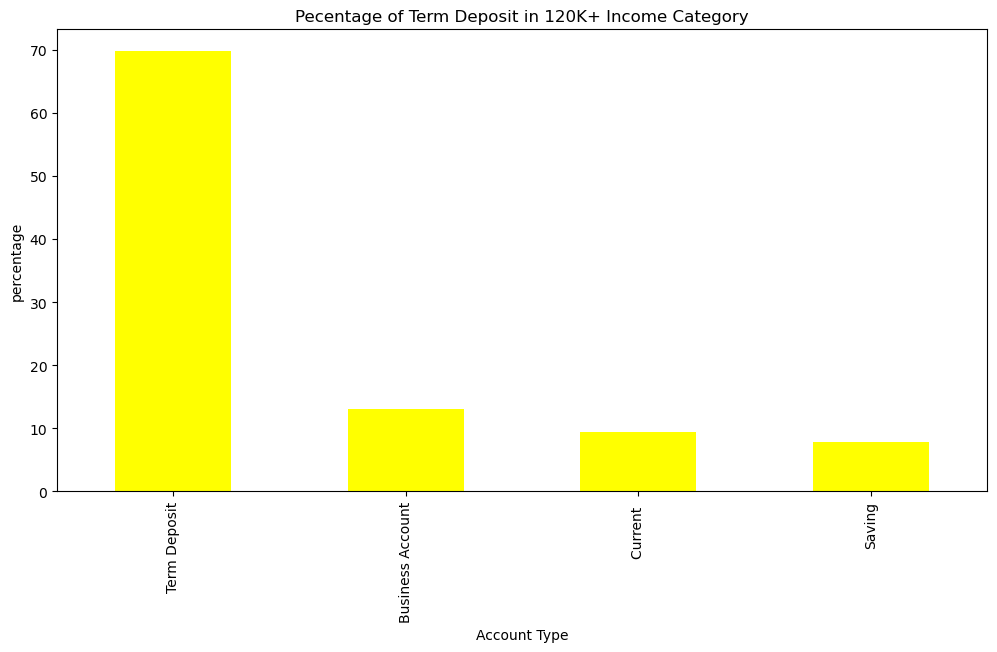

In [105]:
plt.figure(figsize=(12,6))  # (width, height)
percentage.plot(kind ="bar", color = "yellow")
plt.title("Pecentage of Term Deposit in 120K+ Income Category")
plt.xlabel("Account Type")
plt.ylabel("percentage")


## Analysis

1. Potential growth of term deposits:

Based on the data, term deposits currently hold a significant share of near 70% compared to other account types. This suggests a potential trend towards continued growth in term deposits, especially if they offer competitive interest rates or cater to specific customer needs like long-term savings goals.

2. Impact of economic factors:

Economic factors like interest rate fluctuations, market conditions, and consumer confidence can influence investment and savings behavior. Analyzing historical data alongside economic trends might help predict how these factors might affect the demand for different account types, including term deposits.

In [106]:
data_df.to_csv("cleaned_final_data.csv", index =False)